In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("df_grouped.csv").drop(columns=["Unnamed: 0"])

In [5]:
len(df)

2381

In [6]:
df[df["Total_Months_Worked"]>20]

,Driver_ID,Gender,City,Education_Level,Joining Designation,Current_date,Total_Months_Worked,Max_Grade,Income_Total,Age_Max,Total_Business_Value,Quarterly_Rating_Mean,Churn_User
8,13,0.0,C19,2.0,1.0,12/01/19,23,4.0,2742221.0,31.0,10213040.0,1.260870,1.0
17,25,0.0,C24,1.0,1.0,12/01/20,24,3.0,2449848.0,31.0,36351110.0,3.750000,0.0
18,26,0.0,C14,2.0,1.0,12/01/20,24,4.0,3027176.0,43.0,69867900.0,3.083333,0.0
42,56,1.0,C19,2.0,1.0,12/01/20,24,1.0,1925352.0,36.0,11723470.0,2.875000,0.0
46,60,1.0,C20,0.0,1.0,12/01/20,24,4.0,2015820.0,48.0,49225520.0,3.500000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2342,2740,0.0,C22,2.0,1.0,12/01/20,24,2.0,854352.0,47.0,20843460.0,3.125000,0.0
2351,2753,1.0,C11,1.0,1.0,12/01/20,24,5.0,3473424.0,40.0,61583040.0,2.750000,0.0
2363,2766,1.0,C21,1.0,2.0,12/01/20,24,3.0,1291032.0,37.0,25164110.0,2.875000,1.0
2366,2771,0.0,C12,0.0,2.0,12/01/20,24,4.0,2194944.0,41.0,19597020.0,2.000000,0.0


In [27]:
df["Gender"].value_counts()

Gender
0.0    1404
1.0     977
Name: count, dtype: int64

In [10]:
df["Churn_User"].value_counts()/2381

Churn_User
1.0    0.676606
0.0    0.323394
Name: count, dtype: float64

In [ ]:
# Not Doing Oversampling to balance classes as the proportion is significant 

In [15]:
df["Year"] = pd.to_datetime(df["Current_date"], format='%m/%d/%y').dt.year

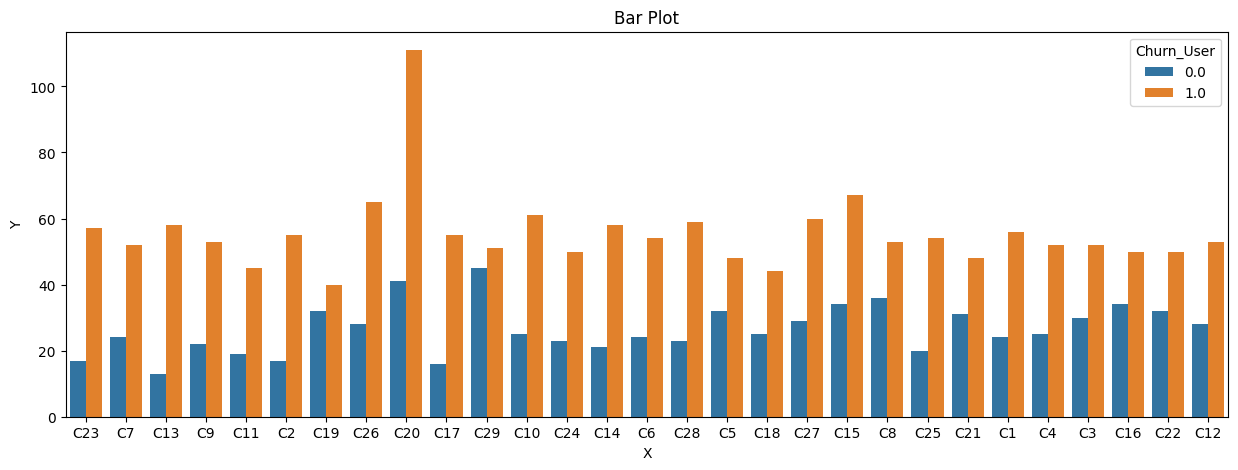

In [54]:
plt.figure(figsize=(15, 5)) 
sns.countplot(df, x="City", hue="Churn_User")
#sns.barplot(df, x="City", y="Total_Business_Value",  hue="Churn_User")
plt.title('Bar Plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

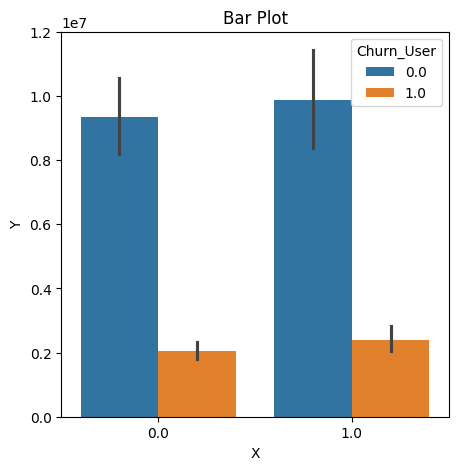

In [37]:
plt.figure(figsize=(5, 5)) 
sns.barplot(df, x="Gender", y="Total_Business_Value",  hue="Churn_User")
plt.title('Bar Plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

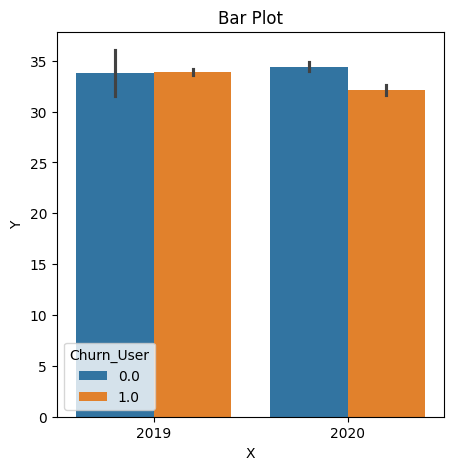

In [24]:
plt.figure(figsize=(5, 5)) 
sns.barplot(df, x="Year", y="Age_Max", hue="Churn_User")
plt.title('Bar Plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

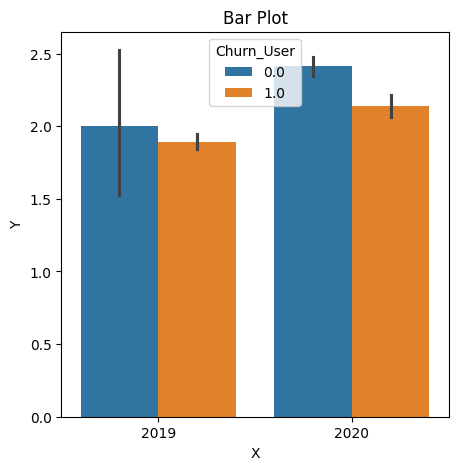

In [23]:
plt.figure(figsize=(5, 5)) 
sns.barplot(df, x="Year", y="Max_Grade", hue="Churn_User")
plt.title('Bar Plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

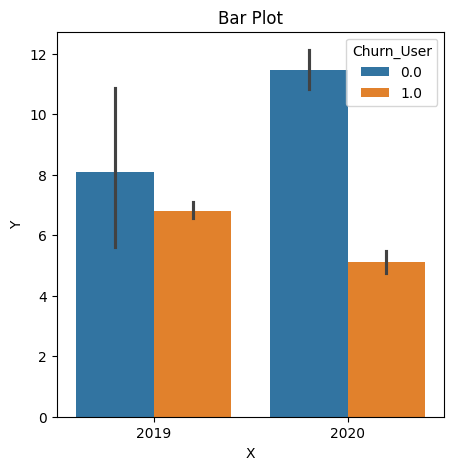

In [22]:
plt.figure(figsize=(5, 5)) 
sns.barplot(df, x="Year", y="Total_Months_Worked", hue="Churn_User")
plt.title('Bar Plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

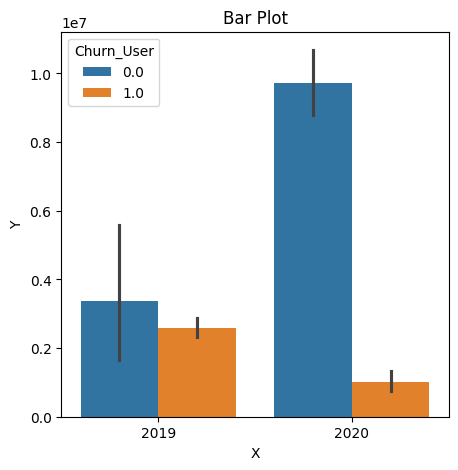

In [17]:
plt.figure(figsize=(5, 5)) 
sns.barplot(df, x="Year", y="Total_Business_Value", hue="Churn_User")
plt.title('Bar Plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

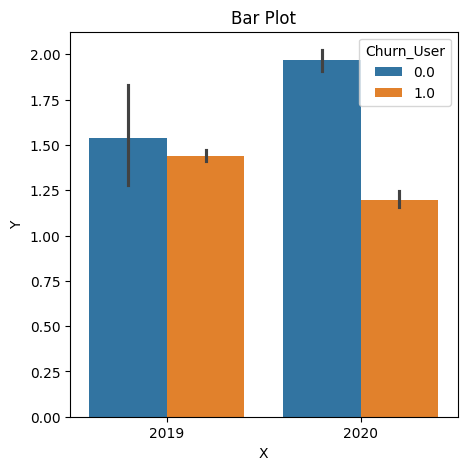

In [20]:
plt.figure(figsize=(5, 5)) 
sns.barplot(df, x="Year", y="Quarterly_Rating_Mean", hue="Churn_User")
plt.title('Bar Plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

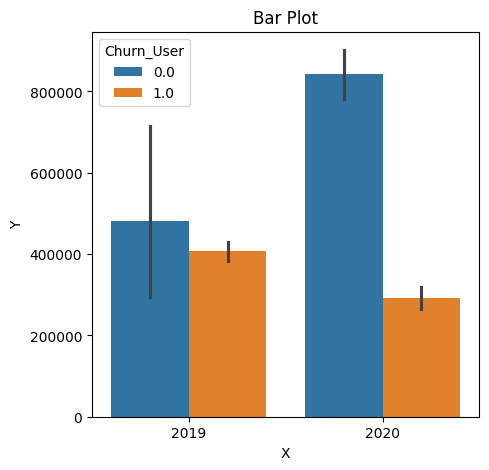

In [21]:
plt.figure(figsize=(5, 5)) 
sns.barplot(df, x="Year", y="Income_Total", hue="Churn_User")
plt.title('Bar Plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [ ]:
# Graphs shows that all continuous features contribute towards classification lets do Hypothesi testing for the same

In [38]:
df.columns

Index(['Driver_ID', 'Gender', 'City', 'Education_Level', 'Joining Designation',
       'Current_date', 'Total_Months_Worked', 'Max_Grade', 'Income_Total',
       'Age_Max', 'Total_Business_Value', 'Quarterly_Rating_Mean',
       'Churn_User', 'Year'],
      dtype='object')

In [55]:
from scipy.stats import f_oneway, ttest_ind, chi2_contingency


In [52]:
for feature in ['Education_Level', 'Total_Months_Worked', 'Max_Grade', 'Income_Total', 'Age_Max', 'Total_Business_Value', 'Quarterly_Rating_Mean']:
    print("==================>", feature)
    print(df.groupby(["Churn_User"])[feature].mean())
    # Conduct the one-way ANOVA
    print()
    print(f_oneway(list(df[df["Churn_User"]==0][feature]), list(df[df["Churn_User"]==1][feature])))
    print()
    print(ttest_ind(list(df[df["Churn_User"]==0][feature]), list(df[df["Churn_User"]==1][feature])))

==================> Education_Level
Churn_User
0.0    1.019481
1.0    1.001862
Name: Education_Level, dtype: float64

F_onewayResult(statistic=0.24262121453200705, pvalue=0.622364766950492)

TtestResult(statistic=0.4925659494240414, pvalue=0.6223647669499235, df=2379.0)
==================> Total_Months_Worked
Churn_User
0.0    11.368831
1.0     6.392303
Name: Total_Months_Worked, dtype: float64

F_onewayResult(statistic=318.48605243568124, pvalue=5.908683829514221e-67)

TtestResult(statistic=17.84617753009538, pvalue=5.908683829521455e-67, df=2379.0)
==================> Max_Grade
Churn_User
0.0    2.400000
1.0    1.952204
Name: Max_Grade, dtype: float64

F_onewayResult(statistic=123.8869809520961, pvalue=4.348154265151052e-28)

TtestResult(statistic=11.1304528637471, pvalue=4.348154265156134e-28, df=2379.0)
==================> Income_Total
Churn_User
0.0    832133.658442
1.0    378981.928616
Name: Income_Total, dtype: float64

F_onewayResult(statistic=311.95289694495733, pvalue=1.06687

In [51]:
# From thes tests other than Education_Level all the continuous features pass the tests so consider them for building the model


TtestResult(statistic=0.4925659494240414, pvalue=0.6223647669499235, df=2379.0)

In [56]:
df.columns

Index(['Driver_ID', 'Gender', 'City', 'Education_Level', 'Joining Designation',
       'Current_date', 'Total_Months_Worked', 'Max_Grade', 'Income_Total',
       'Age_Max', 'Total_Business_Value', 'Quarterly_Rating_Mean',
       'Churn_User', 'Year'],
      dtype='object')

In [59]:
contingency_table = pd.crosstab(df['City'], df['Churn_User'])

# Perform Chi-square test
#chi2_contingency(contingency_table)
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of freedom:", dof)

Chi-square statistic: 47.56838333916246
P-value: 0.011921264174788875
Degrees of freedom: 28


In [60]:
contingency_table = pd.crosstab(df['Gender'], df['Churn_User'])

# Perform Chi-square test
#chi2_contingency(contingency_table)
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of freedom:", dof)

Chi-square statistic: 0.23610018469588578
P-value: 0.6270370654022519
Degrees of freedom: 1


In [ ]:
# Removing Gender, Education_Level features and building the model
# Removing City to reduce dimensions due to onehot encoding

In [79]:
df["Churn_User"] = df[["Churn_User"]].astype(int)

In [80]:
X = df[[ 'Joining Designation',
       'Total_Months_Worked', 'Max_Grade', 'Income_Total',
       'Age_Max', 'Total_Business_Value', 'Quarterly_Rating_Mean']]     
Y= df[["Churn_User"]] 

In [81]:
X

,Joining Designation,Total_Months_Worked,Max_Grade,Income_Total,Age_Max,Total_Business_Value,Quarterly_Rating_Mean
0,1.0,3,1.0,172161.0,28.0,1715580.0,2.000000
1,2.0,2,2.0,134032.0,31.0,0.0,1.000000
2,2.0,5,2.0,328015.0,43.0,350000.0,1.000000
3,1.0,3,1.0,139104.0,29.0,120360.0,1.000000
4,3.0,5,3.0,393640.0,31.0,1265000.0,1.600000
...,...,...,...,...,...,...,...
2376,2.0,24,3.0,1987560.0,34.0,21748820.0,2.625000
2377,1.0,3,1.0,36315.0,34.0,0.0,1.000000
2378,2.0,9,2.0,318330.0,45.0,2815090.0,1.666667
2379,1.0,6,1.0,416988.0,28.0,977830.0,1.500000


In [71]:
pip install xgboost

   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 325.1 kB/s eta 0:05:07
   ---------------------------------------- 0.0/99.8 MB 279.3 kB/s eta 0:05:58
   ---------------------------------------- 0.2/99.8 MB 871.5 kB/s eta 0:01:55
   ---------------------------------------- 0.4/99.8 MB 1.5 MB/s eta 0:01:06
   ---------------------------------------- 0.9/99.8 MB 2.8 MB/s eta 0:00:36
   ---------------------------------------- 1.2/99.8 MB 3.3 MB/s eta 0:00:31
    --------------------------------------- 1.4/99.8 MB 3.3 MB/s eta 0:00:30
    --------------------------------------- 1.7/99.8 MB 3.6 MB/s eta 0:00:28
    --------------------------------------- 1.9/99.8 MB 3.8 MB/s eta 0:00:26
    --------------------------------------- 2.1/99.8 MB 3.8 MB/s eta 0:00:26
    ----------

In [72]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [82]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

# Create the XGBoost classifier
clf = xgb.XGBClassifier()

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7751677852348994


In [84]:
from sklearn.metrics import classification_report, precision_score, recall_score


# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate precision and recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.53      0.61       195
           1       0.80      0.90      0.84       401

    accuracy                           0.78       596
   macro avg       0.75      0.71      0.72       596
weighted avg       0.77      0.78      0.77       596

Precision: 0.7960088691796009
Recall: 0.8952618453865336
